In [1]:
%load_ext autoreload
%autoreload 2

from model.autoregressive import ARModel
from utils.plotter import Plotter

import numpy as np
import statsmodels.api as sm

In [2]:
A = lambda _: np.diag([0, 0.2, 0.99, 1])
initial_condition = np.array([0.1, 0.1, 0.1, 0.1])
time_step = 0.1
system_cov = lambda _: 1 * np.eye(4)
generator = np.random.default_rng(12345)
H = lambda _: np.zeros((0, initial_condition.shape[0]))
ar_model = ARModel(
    A,
    H,
    initial_condition,
    time_step,
    system_cov,
    generator,
    stochastic_integration=True,
)

In [3]:
init_time = 0
end_time = 50
times, states = ar_model.integrate(init_time, end_time)

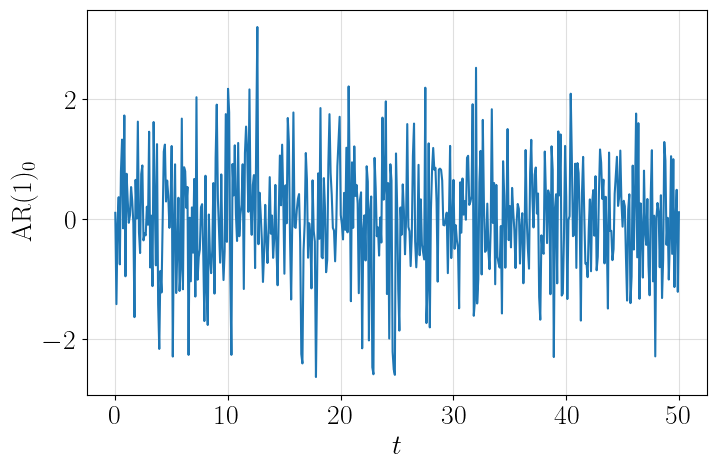

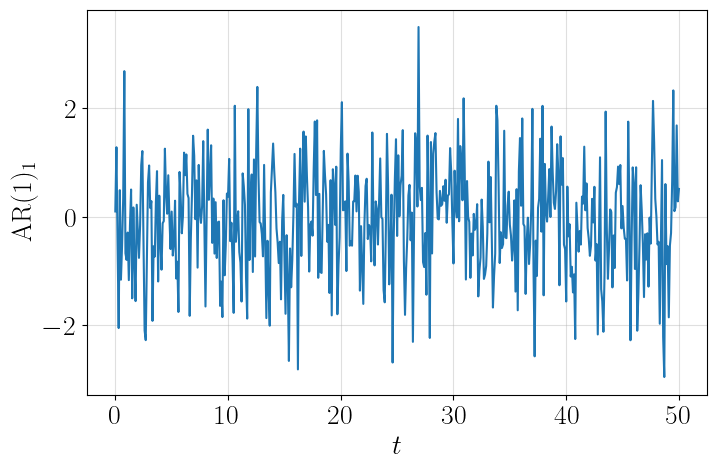

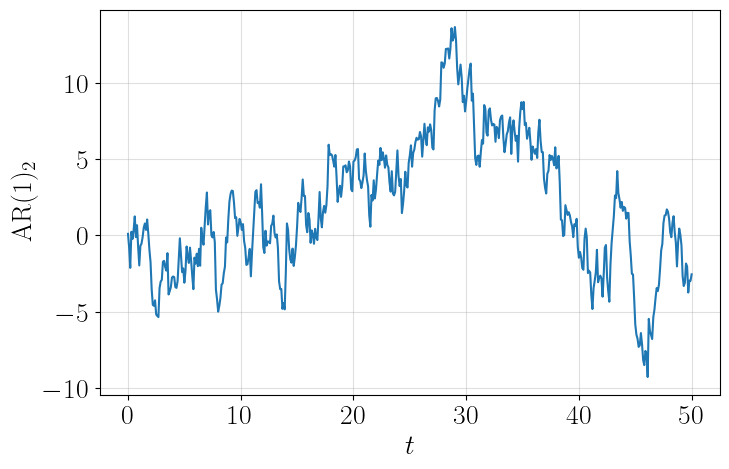

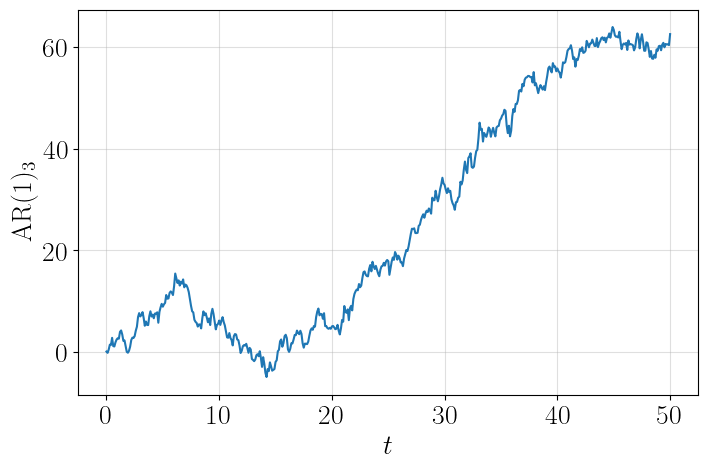

In [4]:
for i in range(len(initial_condition)):
    Plotter.plot(
        times, states[i, :], xlabel="$t$", ylabel=rf"$\mathrm{{{{AR}}}}(1)_{i}$"
    )

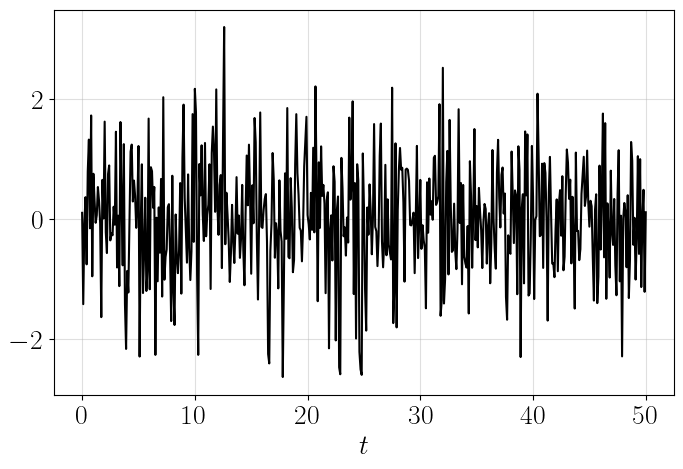

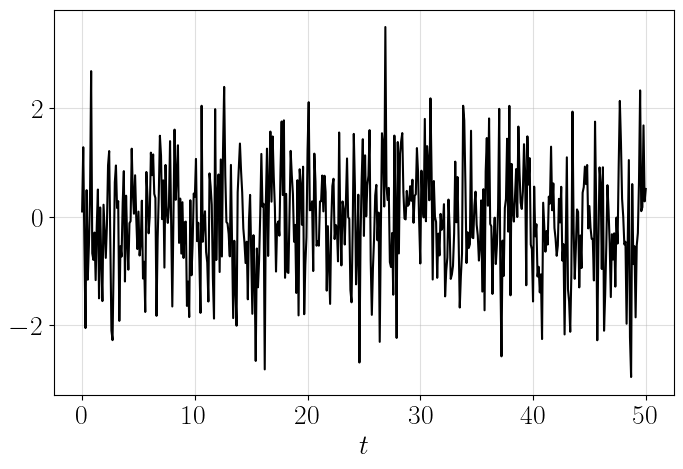

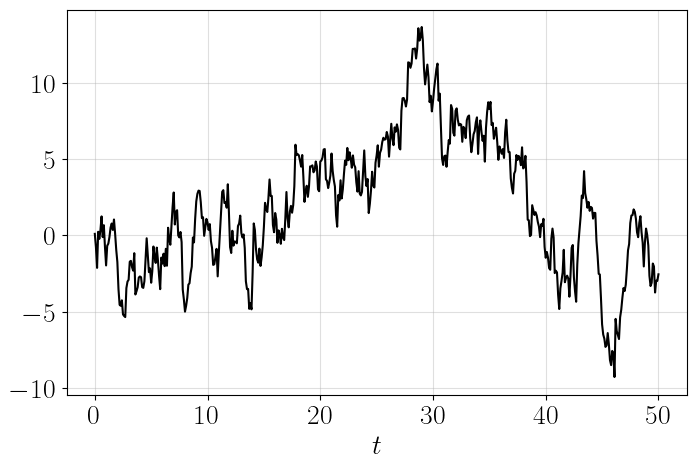

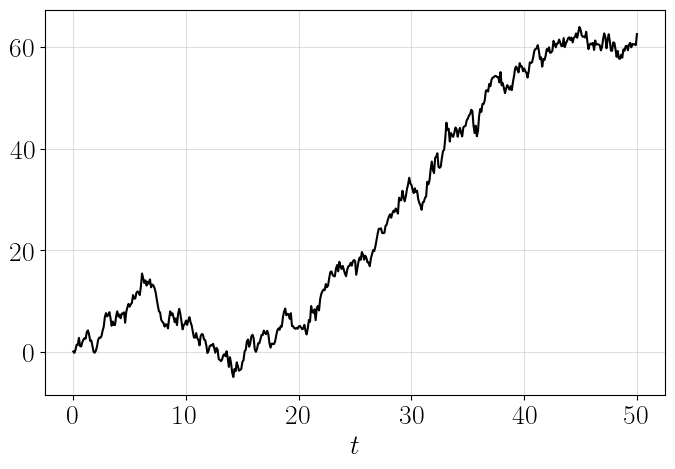

In [5]:
for i in range(len(initial_condition)):
    Plotter.plot(times, states[i, :], color="k", xlabel="$t$", ylabel="", path=f"ar{i}")

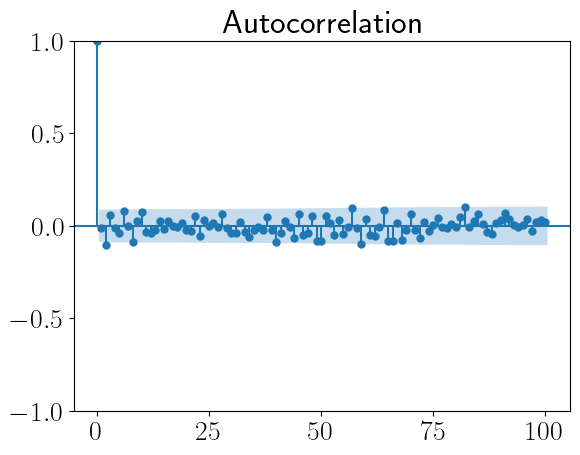

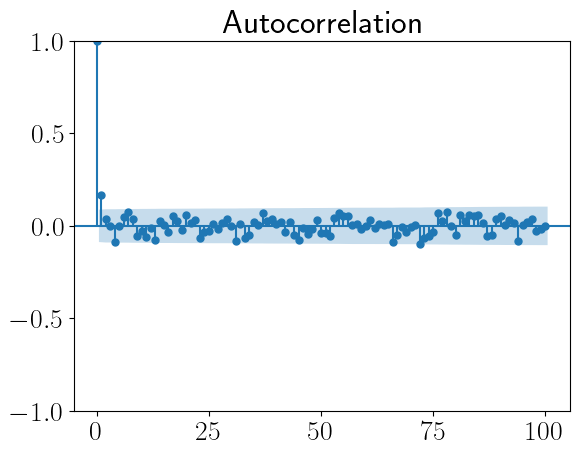

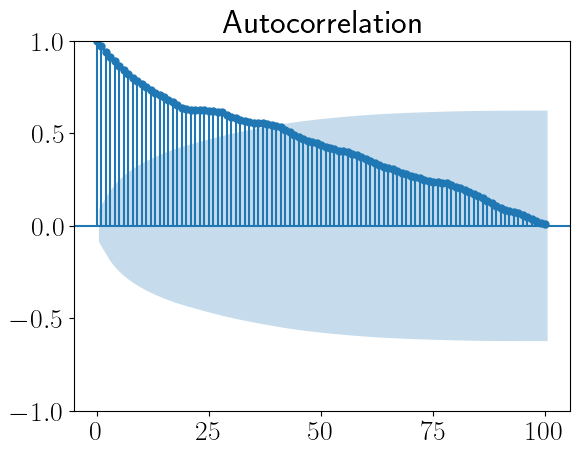

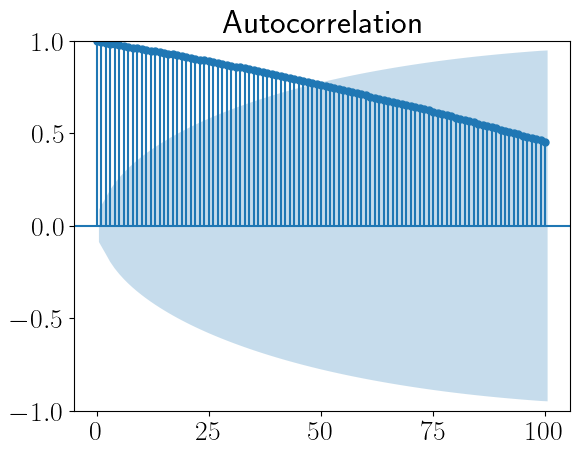

In [6]:
# Autocorrelation functions
for i in range(len(initial_condition)):
    sm.graphics.tsa.plot_acf(states[i, :], lags=100)